# Feature Engineering
## Einfuehrung
## Exploration

In [2]:
## preparation

## load all required libraries
import pandas as pd
import numpy as np

## set data path (optional, simplifies data access)
datapath = '../3_data'
from os import chdir; chdir(datapath)

## load data
data = pd.read_csv('bank_data.csv', sep=';')

## create indices for categorical and numerical variables for later use
cat_vars = data.select_dtypes(include=['object']).columns
num_vars = data.select_dtypes(exclude=['object']).columns

In [3]:
num_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Data Frame

#### Übersicht

In [6]:
## get object type
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
## show dimensions (numbers of rows and columns)
print(data.shape)

(9868, 21)


In [8]:
## structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9745 non-null   float64
 1   job             9795 non-null   object 
 2   marital         9849 non-null   object 
 3   education       9405 non-null   object 
 4   default         9868 non-null   object 
 5   housing         9868 non-null   object 
 6   loan            9868 non-null   object 
 7   contact         9868 non-null   object 
 8   month           9868 non-null   object 
 9   day_of_week     9868 non-null   object 
 10  duration        9817 non-null   float64
 11  campaign        9868 non-null   int64  
 12  pdays           9868 non-null   int64  
 13  previous        9868 non-null   int64  
 14  poutcome        2054 non-null   object 
 15  emp.var.rate    9621 non-null   float64
 16  cons.price.idx  9621 non-null   float64
 17  cons.conf.idx   9621 non-null   f

In [9]:
#df['age'] = np.int64(data['age'])
#print(ata.info())

In [10]:
## show (a selection of the) data
#print(data.head())
print(data.iloc[0:6, 0:6])
#print(data.tail())

    age            job  marital            education  default housing
0  30.0  self-employed   single    university.degree       no      no
1  32.0     technician  married  professional.course       no     yes
2  27.0    blue collar   single             basic.9y  unknown     yes
3  32.0    blue collar   single             basic.6y  unknown     yes
4  27.0         admin.   single    university.degree       no     yes
5  34.0         admin.   single          high.school       no      no


#### NA's (Missing Values)

In [12]:
## how many NAs in total?
print(data.isna().sum().sum())

9284


In [13]:
## how many rows with NA's?
print(data.shape[0] - data.dropna().shape[0])

8036


In [14]:
## how are NAs distributed over variables?
s = data.isna().sum()
print(s[s > 0])

age                123
job                 73
marital             19
education          463
duration            51
poutcome          7814
emp.var.rate       247
cons.price.idx     247
cons.conf.idx      247
dtype: int64


In [15]:
## do missing values from the socioeconomics characteristics come from the same observations?
data[data['emp.var.rate'].isnull() & 
     data['cons.price.idx'].isnull() &
     data['cons.conf.idx'].isnull()
    ].shape[0]

247

#### Duplikate

In [17]:
## count duplicates
data.duplicated().sum()

7

In [18]:
## show duplicates
dups = data.duplicated()
data[dups==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2420,52.0,blue collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,NaN,1.4,93.444,-36.1,4.963,5228.1,yes
3551,37.0,blue collar,single,high.school,no,yes,no,telephone,jun,mon,...,3,999,0,NaN,1.4,94.465,-41.8,4.961,5228.1,no
5080,68.0,retired,married,basic.4y,no,yes,yes,cellular,may,fri,...,1,6,1,success,-1.8,93.876,-40.0,0.684,5008.7,yes
6700,26.0,blue collar,single,high.school,no,yes,yes,cellular,jul,mon,...,2,999,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
9183,45.0,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,NaN,-2.9,92.469,-33.6,1.072,5076.2,yes
9534,47.0,blue collar,single,basic.6y,no,no,no,cellular,apr,thu,...,1,999,0,NaN,-1.8,93.075,-47.1,1.365,5099.1,yes
9606,41.0,management,married,basic.6y,no,no,no,cellular,apr,thu,...,1,999,0,NaN,-1.8,93.075,-47.1,1.365,5099.1,yes


### Kategoriale Variablen

#### Quantitativ

In [21]:
## rep: show head of education
print(data.education.head())

0      university.degree
1    professional.course
2               basic.9y
3               basic.6y
4      university.degree
Name: education, dtype: object


In [22]:
## statistical measures of one selected categorical variable
print(data.education.describe())

count                  9405
unique                    7
top       university.degree
freq                   3136
Name: education, dtype: object


In [23]:
## statistical measures of all categorical variables
print(data[cat_vars].describe())

           job  marital          education default housing  loan   contact  \
count     9795     9849               9405    9868    9868  9868      9868   
unique      11        3                  7       2       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      2630     5747               3136    8268    5211  8196      6993   

       month day_of_week poutcome     y  
count   9868        9868     2054  9868  
unique    10           5        2     2  
top      may         thu  failure    no  
freq    2745        2152     1101  5223  


In [24]:
## overview number occurrences of values for a selected categorical variable
print(data.education.value_counts())

education
university.degree      3136
high.school            2230
professional.course    1307
basic.9y               1251
basic.4y                972
basic.6y                503
illiterate                6
Name: count, dtype: int64


In [25]:
## unique values of all not numerical variables of a pandas data frame
print(data[cat_vars].nunique())

job            11
marital         3
education       7
default         2
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        2
y               2
dtype: int64


#### Visuell

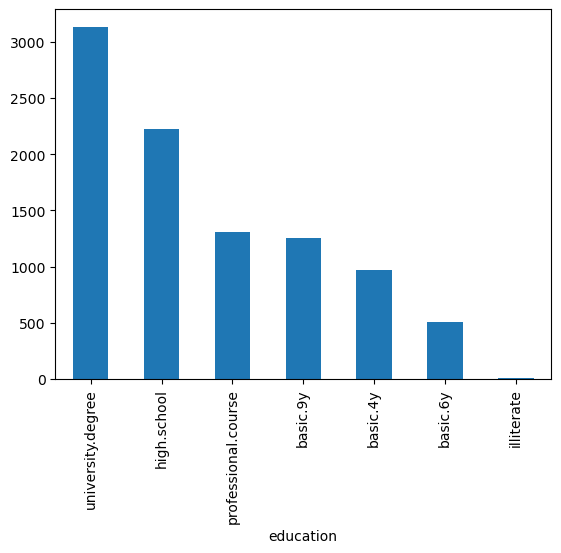

In [27]:
## barplot
data.education.value_counts().plot.bar();

#### Zero- und Low Variance

### Numerische Variablen

#### Qualittativ

In [31]:
## statistical measures of one selected numerical variable
print(data.age.describe())

count    9745.000000
mean       40.423191
std        11.915715
min        17.000000
25%        31.000000
50%        38.000000
75%        48.000000
max       116.000000
Name: age, dtype: float64


In [32]:
## statistical measures of all numerical variables of a data frame
print(data.describe())
## the same as
# print(data[num_vars].describe())

               age     duration     campaign        pdays     previous  \
count  9745.000000  9817.000000  9868.000000  9868.000000  9868.000000   
mean     40.423191   378.159927     2.387617   895.442136     0.296109   
std      11.915715   356.220783     2.512851   303.530529     0.678229   
min      17.000000     0.000000     1.000000     0.000000     0.000000   
25%      31.000000   139.000000     1.000000   999.000000     0.000000   
50%      38.000000   258.000000     2.000000   999.000000     0.000000   
75%      48.000000   508.000000     3.000000   999.000000     0.000000   
max     116.000000  4199.000000    43.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   9621.000000     9621.000000    9621.000000  9868.000000  9868.000000  
mean      -0.440495       93.488617     -40.227804     3.028964  5138.570075  
std        1.717659        0.629874       5.298546     1.886748    86.254277  
min       -3.4000

In [33]:
## unique values of all numerical variables of a pandas data frame
print(data[num_vars].nunique())

age                 77
duration          1409
campaign            34
pdays               26
previous             7
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          299
nr.employed         11
dtype: int64


#### Visuell

**Histogramm**

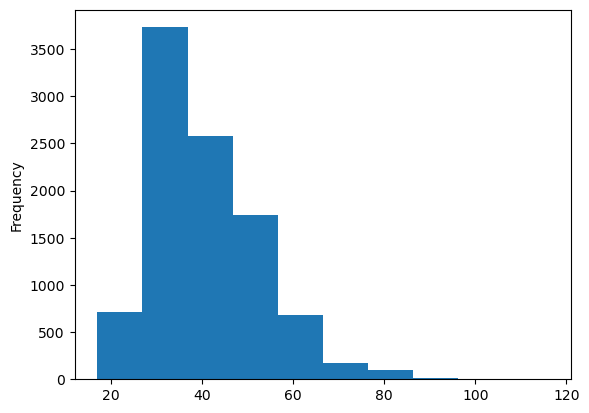

In [36]:
## histogram
data.age.plot.hist();

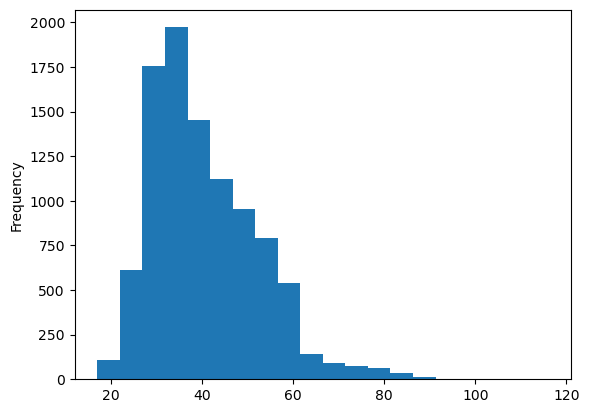

In [37]:
## histogram with differen number of bins (default=10)
data.age.plot.hist(bins=20);

**Densityplot**

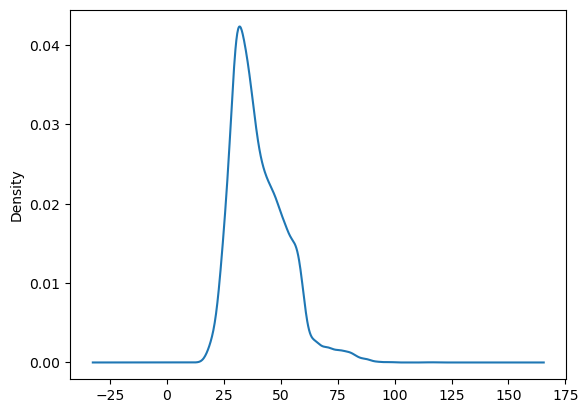

In [39]:
## densityplot
data.age.plot.kde();

**Boxplot**

In [41]:
## boxplot (vertikal: default)
#data.age.plot.box();

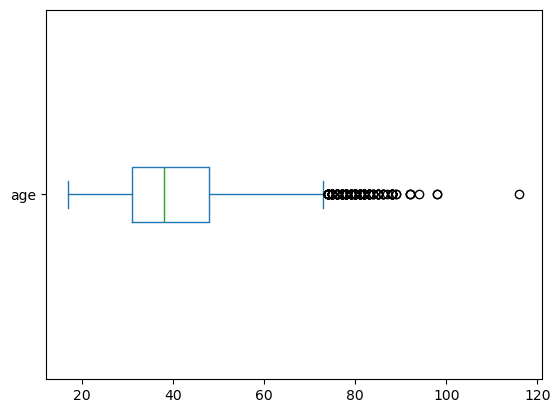

In [42]:
## boxplot horizontal
data.age.plot.box(vert=False);

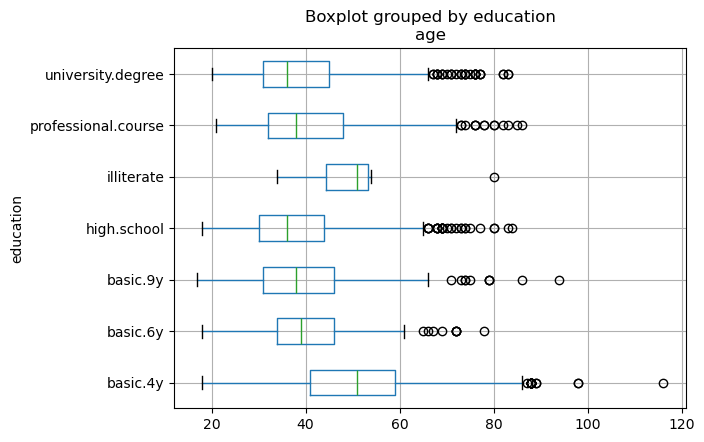

In [43]:
## grouped boxplots
data.boxplot(column=['age'], 
           by='education', 
           vert=False);

#### Extremwerte (Ausreisser)

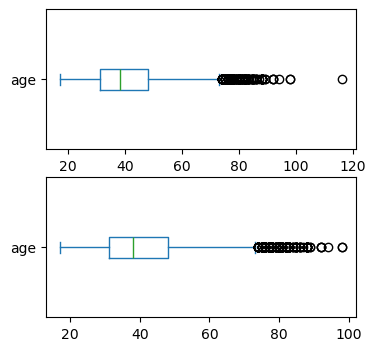

In [45]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 4))
data.age.plot.box(ax=axes[0], vert=False)
data[data.age != max(data.age)].age.plot.box(ax=axes[1], vert=False);

In [46]:
## smallest single values
print(data.age.sort_values().head())
print()
# largest single values
print(data.age.sort_values(
    na_position='first').tail())

9644    17.0
4565    17.0
740     17.0
9289    18.0
1243    18.0
Name: age, dtype: float64

3076     92.0
7676     94.0
5668     98.0
8626     98.0
9673    116.0
Name: age, dtype: float64


**IQR Methode (EXTRA)**

**Konvidenzintervall nicht parametrisch (EXTRA)**

**Konvidenzintervall parametrisch (EXTRA)**

#### Zero- und Low Variance

In [51]:
## create demo
pd.options.mode.chained_assignment = None  # default='warn'
tmp_data = data[num_vars]
tmp_data.loc[:, 'age_zv'] = tmp_data['age'].mean()
tmp_data['age_lv'] = tmp_data.age_zv
tmp_data.loc[0, 'age_lv'] = tmp_data['age'].max()

#print(tmp_data[['age', 'age_zv', 'age_lv']].head())
print(tmp_data[['age', 'age_zv', 'age_lv']].std())

age       1.191572e+01
age_zv    7.546346e-12
age_lv    7.608061e-01
dtype: float64


### Interaktionen

#### Kategorial quantitativ

**Crosstab**

In [55]:
## keep result (ct) as object for later use
ct = pd.crosstab(data['job'], data['education'])
print(ct)

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               23        28       122          778           0   
blue collar         442       299       689          217           2   
entrepreneur         25        17        37           39           1   
housemaid           122        17        19           45           0   
management           11        20        31           58           0   
retired             239        18        40           96           2   
self-employed        24         3        46           21           1   
services             25        58        82          563           0   
student              11         8        43          142           0   
technician           13        20        94          201           0   
unemployed           27        10        44           67           0   

education      professional.course  university.degree  
job    

In [56]:
## as formatted output
ct.style.background_gradient(axis=None) ## for all cells

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
job,,,,,,,
admin.,23,28,122,778,0,96,1513
blue collar,442,299,689,217,2,106,17
entrepreneur,25,17,37,39,1,28,135
housemaid,122,17,19,45,0,21,34
management,11,20,31,58,0,20,518
retired,239,18,40,96,2,84,94
self-employed,24,3,46,21,1,39,194
services,25,58,82,563,0,47,45
student,11,8,43,142,0,19,53


#### Kategorial visuell

**ab hier wird auch mit seaborn gearbeitet**

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  ## set seaborn defaults
%matplotlib inline

ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html  

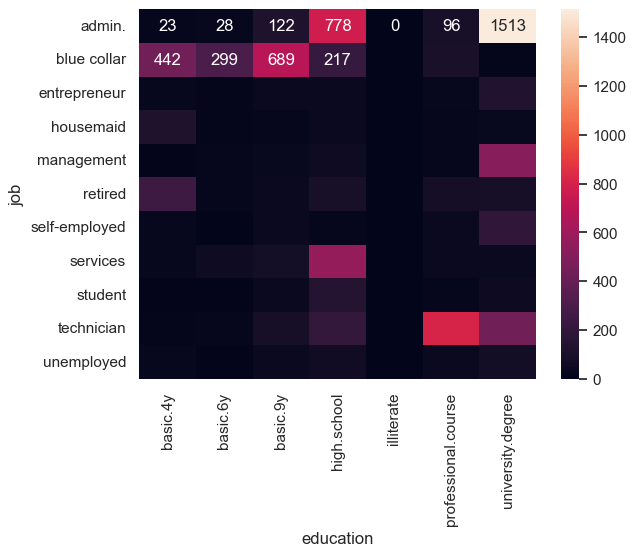

In [61]:
sns.heatmap(
    ct,          ## crosstab from  above
    annot=True,  ## schow frequencies
    fmt='d');    ## numter formatting

#### Numerische quantitativ

In [63]:
## correlation between two selected variables
corr = data[['age', 'duration']].corr()
print(corr)

               age  duration
age       1.000000 -0.017126
duration -0.017126  1.000000


In [64]:
## corelations between all numerical variables of a data frame
## calculate correlations between all pairs of variables
## result is a (quadratic) data frame
corr = data[num_vars].corr()
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.017126 -0.005069 -0.060511  0.058461   
duration       -0.017126  1.000000 -0.031697  0.016739 -0.031071   
campaign       -0.005069 -0.031697  1.000000  0.090395 -0.099643   
pdays          -0.060511  0.016739  0.090395  1.000000 -0.706271   
previous        0.058461 -0.031071 -0.099643 -0.706271  1.000000   
emp.var.rate   -0.050253  0.043576  0.193668  0.335149 -0.390984   
cons.price.idx -0.018856  0.039572  0.134775  0.046462 -0.073817   
cons.conf.idx   0.138925 -0.054292 -0.031190 -0.158202  0.078954   
euribor3m      -0.046517  0.031382  0.184284  0.384504 -0.455386   
nr.employed    -0.076147  0.034808  0.186245  0.469632 -0.528868   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.050253       -0.018856       0.138925  -0.046517   
duration            0.043576        0.039572      -0.054292   0.031382   
campaign            0.193668 

#### Numerische visuell

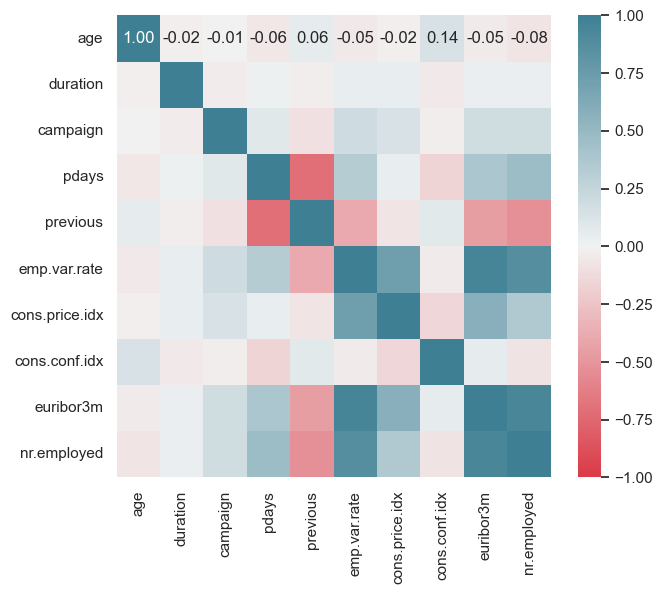

In [66]:
plt.figure(figsize=(7, 6))  ## figure size
ax = sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',  ## format annotations
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap=sns.diverging_palette(  ## color palette
        10, 220, as_cmap=True), 
    vmin=-1, vmax=1)

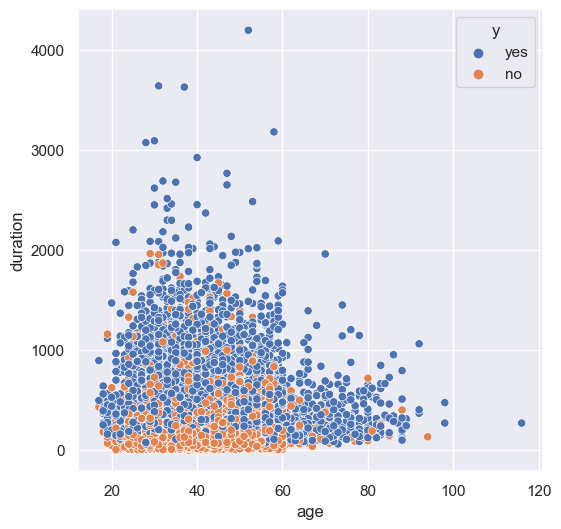

In [67]:
## scatterplot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='age', y='duration', data=data, hue='y');

#### Lineare Zusammenhänge

In [69]:
## create a simulation of linear dependencie and high corr
tmp_data = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']]
tmp_data.rename(columns={
    'emp.var.rate': 'X1',
    'cons.price.idx' : 'X2', 
    'cons.conf.idx': 'X3', 
    'euribor3m': 'X4'
}, inplace=True)
tmp_data['X5'] = tmp_data.X4 / 2
tmp_data['X6'] = tmp_data.X5 + np.random.randn(tmp_data.shape[0]) / 10

tmp_data.X4 + np.random.rand(tmp_data.shape[0])

## correlation matrix
corr = tmp_data.corr()
print(corr)

## show correlation matrix with different mask thresholds
print(corr.where(abs(corr) == 1))
pd.set_option('display.precision', 2)
print(corr.where(abs(corr) >= 0.99))
pd.set_option('display.precision', 6)

          X1        X2        X3        X4        X5        X6
X1  1.000000  0.726008 -0.045463  0.960188  0.960188  0.955107
X2  0.726008  1.000000 -0.141679  0.583484  0.583484  0.581768
X3 -0.045463 -0.141679  1.000000  0.058781  0.058781  0.057067
X4  0.960188  0.583484  0.058781  1.000000  1.000000  0.994316
X5  0.960188  0.583484  0.058781  1.000000  1.000000  0.994316
X6  0.955107  0.581768  0.057067  0.994316  0.994316  1.000000
     X1   X2   X3   X4   X5   X6
X1  1.0  NaN  NaN  NaN  NaN  NaN
X2  NaN  1.0  NaN  NaN  NaN  NaN
X3  NaN  NaN  1.0  NaN  NaN  NaN
X4  NaN  NaN  NaN  1.0  1.0  NaN
X5  NaN  NaN  NaN  1.0  1.0  NaN
X6  NaN  NaN  NaN  NaN  NaN  1.0
     X1   X2   X3    X4    X5    X6
X1  1.0  NaN  NaN   NaN   NaN   NaN
X2  NaN  1.0  NaN   NaN   NaN   NaN
X3  NaN  NaN  1.0   NaN   NaN   NaN
X4  NaN  NaN  NaN  1.00  1.00  0.99
X5  NaN  NaN  NaN  1.00  1.00  0.99
X6  NaN  NaN  NaN  0.99  0.99  1.00


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


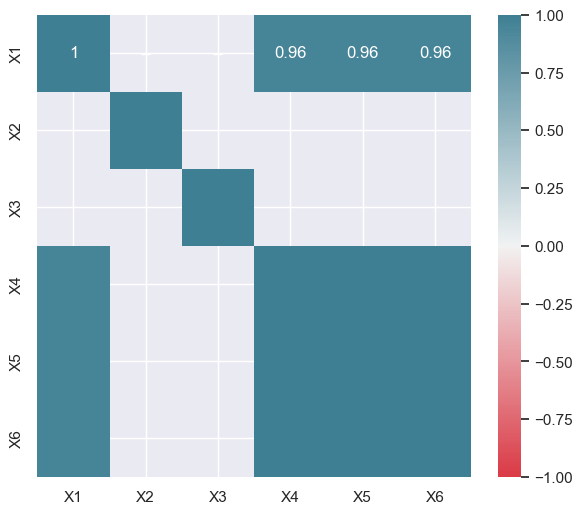

In [70]:
## plot
mask = corr.where(abs(corr) >= 0.95)
plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    mask,
    annot=True,
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(  ## color scheme
        10, 220, as_cmap=True));

#### PhiK (EXTRA)

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


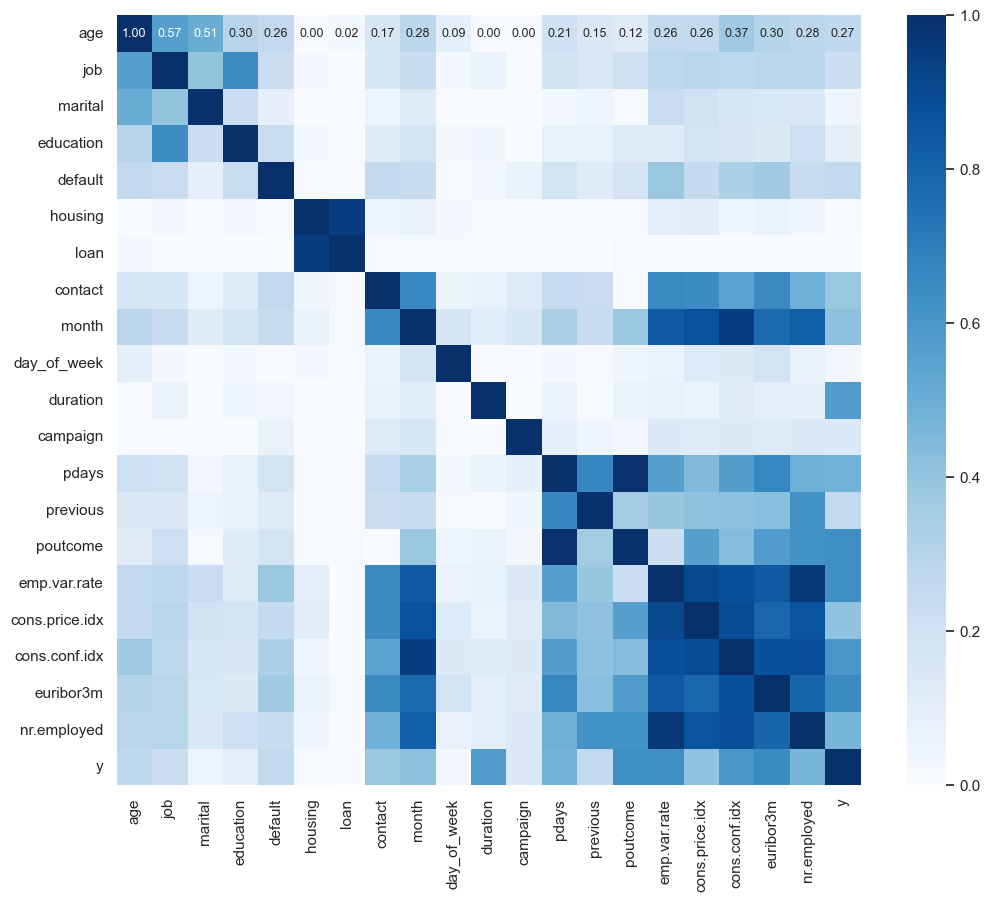

In [72]:
## ref: https://phik.readthedocs.io/en/latest/phik.html
## install
# !pip install phik

data = pd.read_csv('bank_data.csv', sep=';')

from phik import resources, report
cor = data.phik_matrix()
#cor.style.background_gradient()

## heatmap
plt.figure(figsize=(12, 10))  ## figure size
ax = sns.heatmap(
    cor, 
    annot=True,
    annot_kws={'fontsize':9}, 
    fmt='.2f',  ## format annotations
    cmap='Blues');

### pandas-profiling (ein Nachtrag)
ref: https://github.com/ydataai/ydata-profiling

    ## may need to be installed from the console with admin rights
    pip install ydata-profiling